<a href="https://colab.research.google.com/github/smo216/Machine-Learning-Project/blob/master/Machine_Learning_Final_Project_Sliced_Pandas_Image_Analysis_11_8_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project is unsupervised learning for feature dectection and simularities between images.

Initial Attempts at image processing involve using PCA, NMF and UMAP

Currently the images are fed in as raw 16 bit 20x20 images for a single alloy

Questions:
What Catagorical variables are important?

What preprocessing should be done?

Future work: 

Adapt Unet-NN for image segmentation

Resnet-NN for image classification


In [0]:
#load multiple data
"""Utilize histogram matching to normalize images? https://scikit-image.org/docs/stable/auto_examples/transform/plot_histogram_matching.html#sphx-glr-auto-examples-transform-plot-histogram-matching-py"""

from google.colab import drive
drive.mount('/content/gdrive')
!pip install numpy==1.15.0 #need Numpy 1.15 or it breaks
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

import numpy as np
import pandas as pd
import os

from PIL import Image
from pylab import *
# importing os module 
import os 
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import img_as_ubyte
from skimage import data
from skimage.exposure import histogram
import skimage
import pandas as pd
from pandas import read_csv
import h5py
from skimage import io

train_data_path=r"//content//gdrive//My Drive//PhD Image Processing//Python HP//H5Test Files"
os.chdir(train_data_path)
data=pd.read_hdf('HP1620x20pd4.h5')
firstdata=data[(data["I"]==0)]
data=firstdata
Xog=firstdata["Image"].values


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Data is imported as a H5 pandas dataframe with each image being 20x20 pixels and 16 bit

In [0]:
#defining several variables for later use in the different machine learing models
n_samples = data['Image'].shape[0]
h, w = data['Image'][0].shape

n_features = h*w

#X will remain the main data variable for the different models
#if it is modified the previous version is usual saved to some other variable
Xog = data['Image'].values


for i in range(Xog.shape[0]):
    Xog[i] = Xog[i].reshape(n_features)

X = np.vstack(Xog)
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
#print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 62628
n_features: 400


In [0]:
"""Filters to grab first image"""
firstdata=data[(data["I"]==0)]
firstimg=firstdata["Image"].values
print(firstdata)

from sklearn.decomposition import PCA
n_samplesfd = firstdata.shape[0]

d2_firstdata=[]
for i in range(firstdata.shape[0]):
    firstimg[i] = firstimg[i].reshape(n_features)
d2_firstdata = np.vstack(firstimg)
compfd=h*w
pcafd = PCA(n_components=compfd)
pcafd.fit(d2_firstdata)
PCA(copy=True, iterated_power='auto', n_components=compfd , random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

                                                   Image  ...     Std. Dev.
0      [65535, 65535, 65535, 65535, 65535, 65535, 655...  ...  15297.291338
1      [31611, 14649, 8224, 6168, 4883, 4626, 4626, 4...  ...   9093.075854
2      [32639, 33410, 32896, 32382, 31868, 31868, 313...  ...    960.798332
3      [35209, 34952, 35209, 33667, 34952, 34438, 352...  ...    659.332736
4      [34695, 34438, 34438, 34695, 34181, 34181, 339...  ...   1378.005236
...                                                  ...  ...           ...
62623  [34952, 35466, 35980, 34181, 34438, 34181, 344...  ...   1367.356992
62624  [35723, 36494, 35723, 35466, 36237, 36494, 362...  ...   1400.761844
62625  [37008, 38036, 37522, 37008, 37008, 36751, 380...  ...   1382.559531
62626  [35980, 35723, 35980, 36237, 35980, 35980, 357...  ...   1408.841646
62627  [37008, 35980, 37008, 36237, 36751, 39064, 398...  ...   1221.390810

[62628 rows x 7 columns]


PCA(copy=True, iterated_power='auto', n_components=400, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
#import some more stuff for plotting purposes
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.interpolate import griddata

#defining variables for plotting
x = firstdata['X'].values
y = firstdata['Y'].values

#determine grid boundaries
gridsize = 1000
x_min = 0
x_max = x.max()
y_min = 0
y_max = y.max()

xx = np.linspace(x_min, x_max, gridsize) # array of x values
yy = np.linspace(y_min, y_max, gridsize) # array of y values
grid = np.array(np.meshgrid(xx, yy.T))
grid = grid.reshape(2, grid.shape[1]*grid.shape[2]).T


Text(0.5, 1.0, 'Standard Deviation')

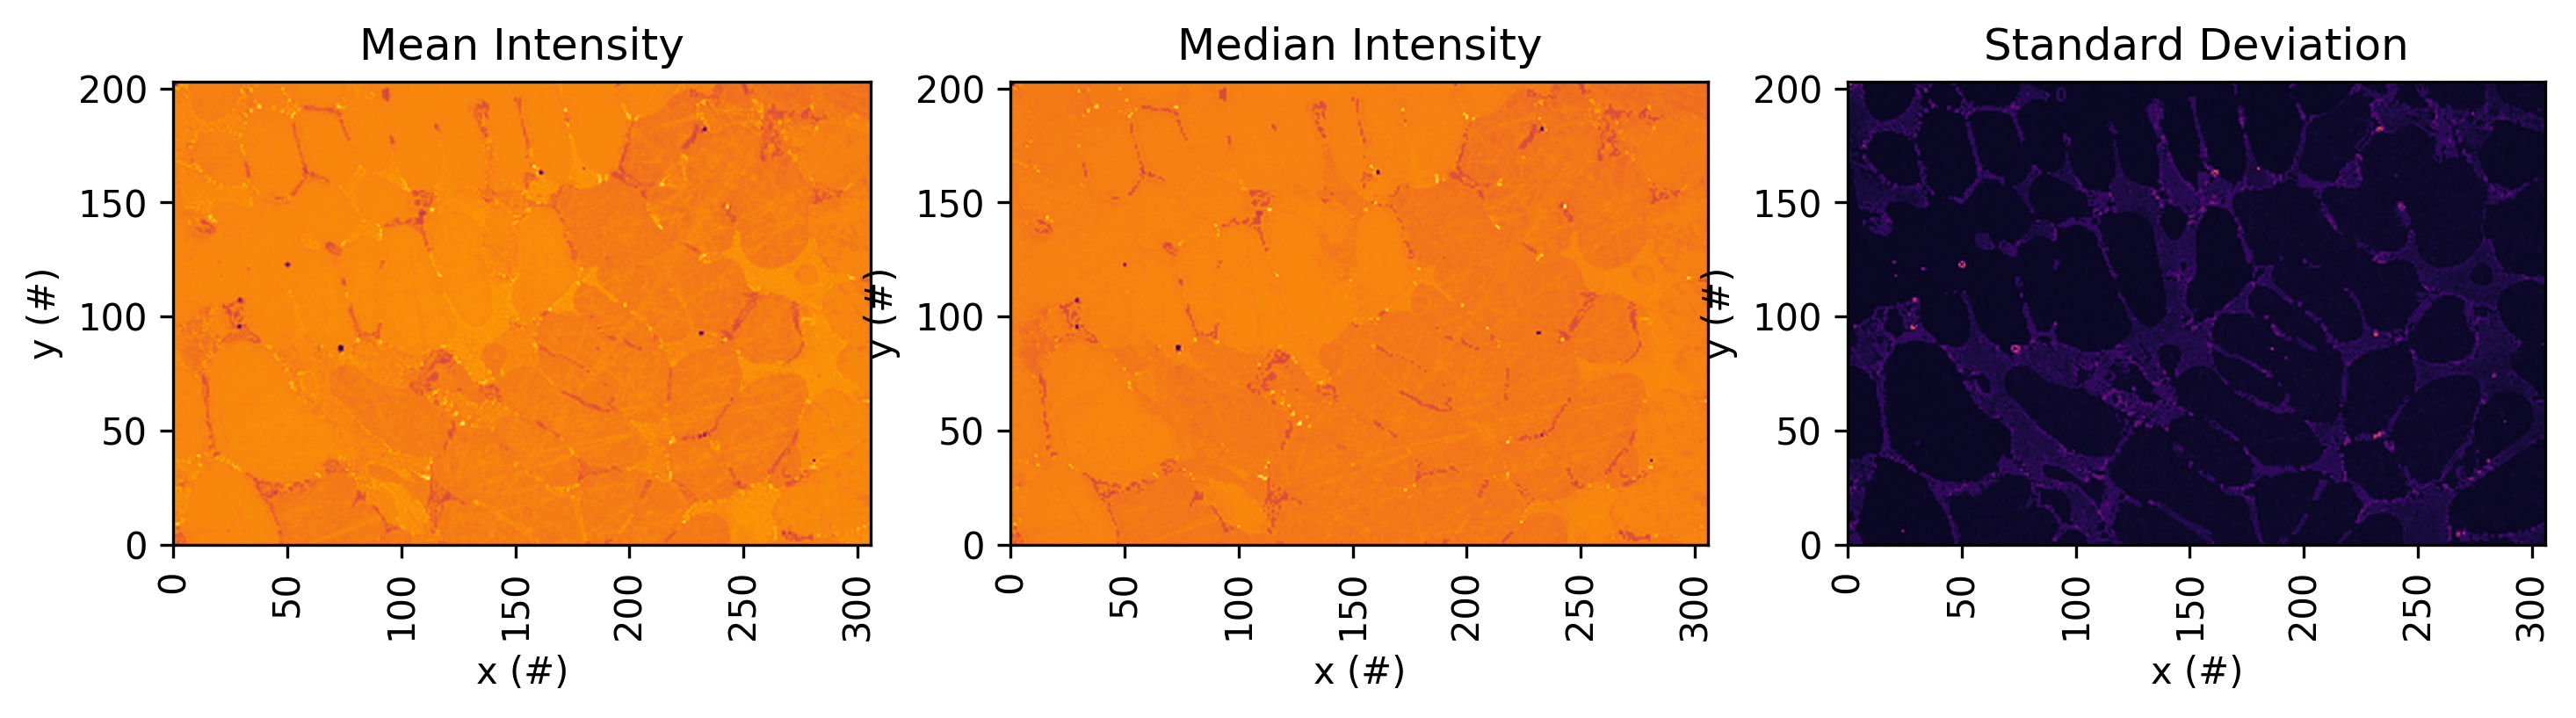

In [0]:
#import some more stuff for plotting purposes
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.interpolate import griddata

#defining variables for plotting
mean = firstdata['Mean'].values
med = firstdata['Median'].values
std = firstdata['Std. Dev.'].values

fig, axs = plt.subplots(1, 3, dpi=300, constrained_layout=False, figsize=(2,10))

for i, j in enumerate([mean,med,std]):

    points = np.array([x, y]).T # because griddata wants it that way
    z_grid2 = griddata(points, j, grid, method='cubic')
    # you get a 1D vector as result. Reshape to picture format!
    z_grid2 = z_grid2.reshape(xx.shape[0], yy.shape[0])

    axs[i].imshow(z_grid2, extent=[x_min, x_max,y_min, y_max],
            origin='upper', cmap=cm.inferno)
    

    #plt.xticks(rotation='90')
    axs[i].set_xlabel('x (#)')
    axs[i].set_xticks(np.arange(x_min,x_max+1,50,))
    axs[i].set_ylabel('y (#)')
    axs[i].set_yticks(np.arange(y_min,y_max+1,50))
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=90)

#plt.xticks(rotation='90')
plt.subplots_adjust(left=0.5,right=5)
axs[0].set_title('Mean Intensity')
axs[1].set_title('Median Intensity')
axs[2].set_title('Standard Deviation')

First attempt-PCA as it is the fastest to run and gives an indication of how many components are needed to represent the dataset

Text(0, 0.5, 'cumulative variance')

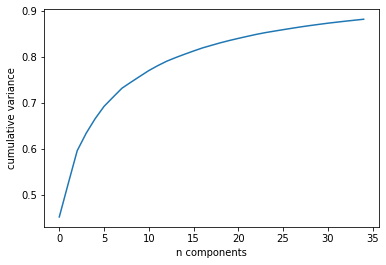

In [0]:
import numpy as np
#import dask.array as da
#!pip install dask_ml
#import dask
from sklearn.decomposition import PCA
#from dask_ml.decomposition import PCA
#d2_dX = Xog.reshape((n_samples,h*w))
comp=35#n_features
n_components=comp
dX =X#d2_dX
pca = PCA(n_components=comp)
pca.fit(dX)
PCA(copy=True, iterated_power='auto', n_components=comp , random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
#print(pca.explained_variance_ratio_)  
#print(pca.singular_values_)  
X_pca = pca.transform(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance')

Appears to converge at less than 25 components

Projecting the input data on the eigenstructures orthonormal basis


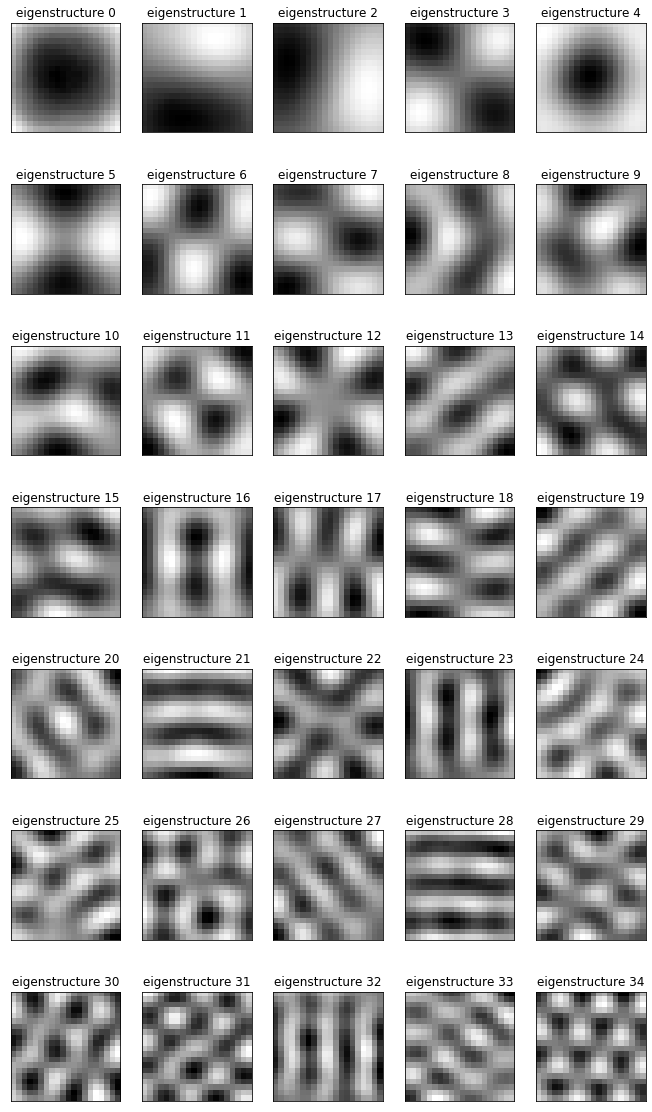

In [0]:
eigenfaces = pca.components_.reshape((comp, h,w))
print("Projecting the input data on the eigenstructures orthonormal basis")

target_names=['HP-6']


def plot_gallery(images, titles, h, w, n_row=7, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

eigenface_titles = ["eigenstructure %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()


PCA appears to be identifying some patterns

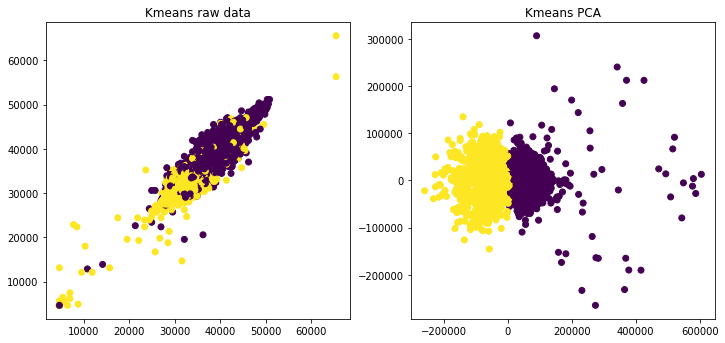

In [0]:
# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause
#takes a while

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

random_state = 170
X=dX

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Kmeans raw data")

X_pca = pca.transform(X)
#t0 = time()
k2_pca_pred = KMeans(n_clusters=2).fit_predict(X_pca)

# Incorrect number of clusters
#y_pred = KMeans(n_clusters=10, random_state=random_state).fit_predict(X)

plt.subplot(222)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=k2_pca_pred)
plt.title("Kmeans PCA")

plt.show()

(62628, 35)


Text(0.5, 1.0, 'PCA Y')

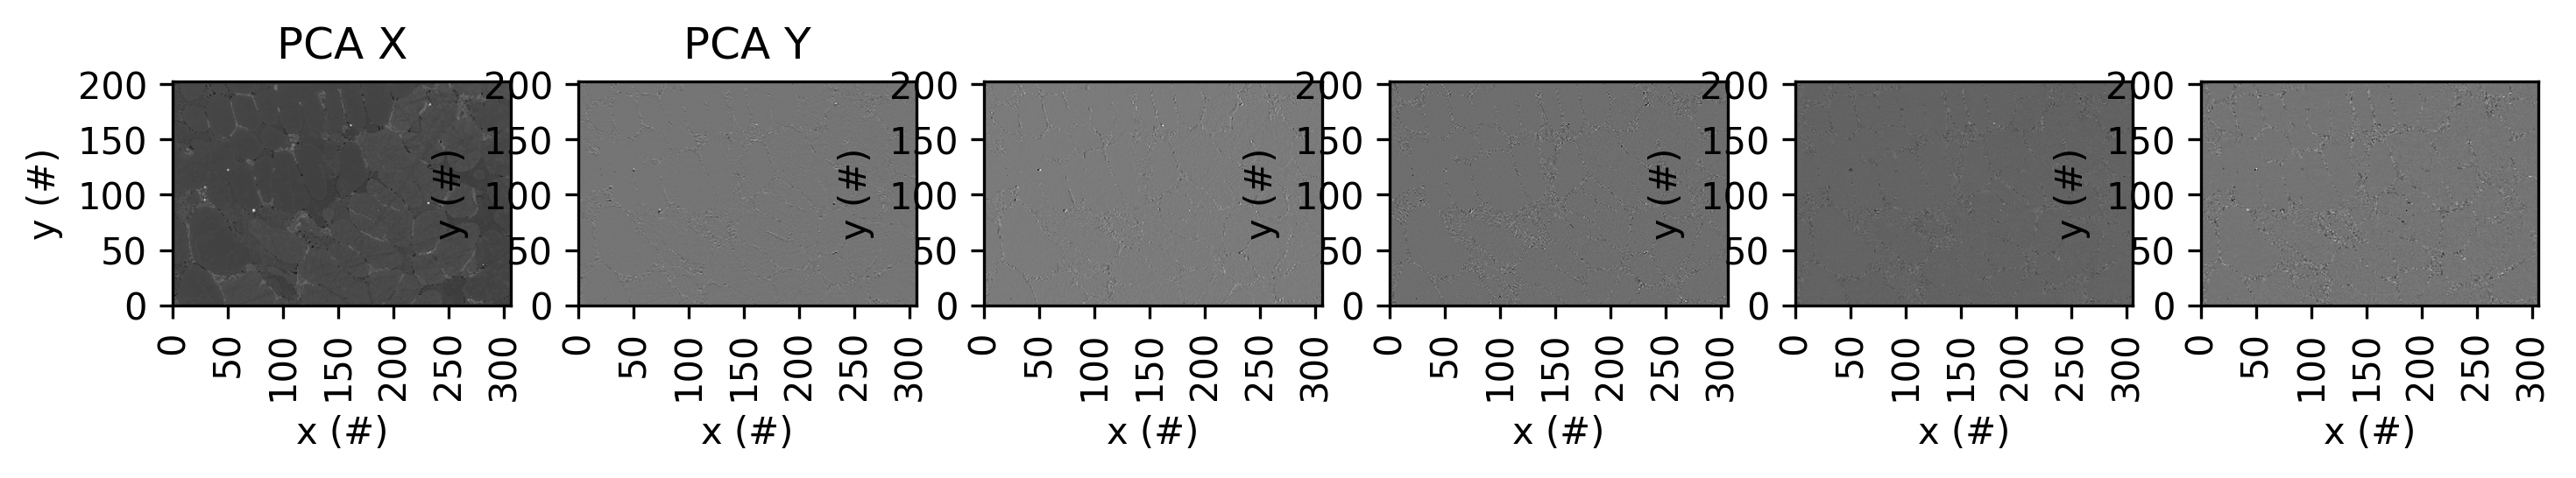

In [0]:
#store PCA data into pandas
data["PCA_X"] = X_pca[:, 0]
data["PCA_Y"] = X_pca[:, 1]
print(X_pca.shape)
#import some more stuff for plotting purposes
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.interpolate import griddata

#defining variables for plotting
x = data['X'].values
y = data['Y'].values

#determine grid boundaries
gridsize = 1000
x_min = 0
x_max = x.max()
y_min = 0
y_max = y.max()

xx = np.linspace(x_min, x_max, gridsize) # array of x values
yy = np.linspace(y_min, y_max, gridsize) # array of y values
grid = np.array(np.meshgrid(xx, yy.T))
grid = grid.reshape(2, grid.shape[1]*grid.shape[2]).T


fig, axs = plt.subplots(1, 6, dpi=300, constrained_layout=False, figsize=(2,10))

for i, j in enumerate([X_pca[:, 0],X_pca[:, 1],X_pca[:, 2],X_pca[:, 3],X_pca[:, 4],X_pca[:, 5]]):

    points = np.array([x, y]).T # because griddata wants it that way
    z_grid2 = griddata(points, j, grid, method='cubic')
    # you get a 1D vector as result. Reshape to picture format!
    z_grid2 = z_grid2.reshape(xx.shape[0], yy.shape[0])

    axs[i].imshow(z_grid2, extent=[x_min, x_max,y_min, y_max],
            origin='upper', cmap=cm.gray)
    

    #plt.xticks(rotation='90')
    axs[i].set_xlabel('x (#)')
    axs[i].set_xticks(np.arange(x_min,x_max+1,50,))
    axs[i].set_ylabel('y (#)')
    axs[i].set_yticks(np.arange(y_min,y_max+1,50))
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=90)

#plt.xticks(rotation='90')
plt.subplots_adjust(left=0.5,right=5)
axs[0].set_title('PCA X')
axs[1].set_title('PCA Y')
#axs[2].set_title('Raw Image')


Initial grouping is poor but PCA helps organize the data

Next try NMF


In [0]:
from sklearn.decomposition import NMF
nmfmodel = NMF(n_components=4, init='random', random_state=0, l1_ratio=1)
nmfmodelpca = NMF(n_components=4, init='random', random_state=0)

In [0]:
X_nmf = nmfmodel.fit_transform(dX)
#X_nmf_pca = nmfmodelpca.fit_transform(X_pca)
H = nmfmodel.components_

Text(0.5, 1.0, 'NMF Y')

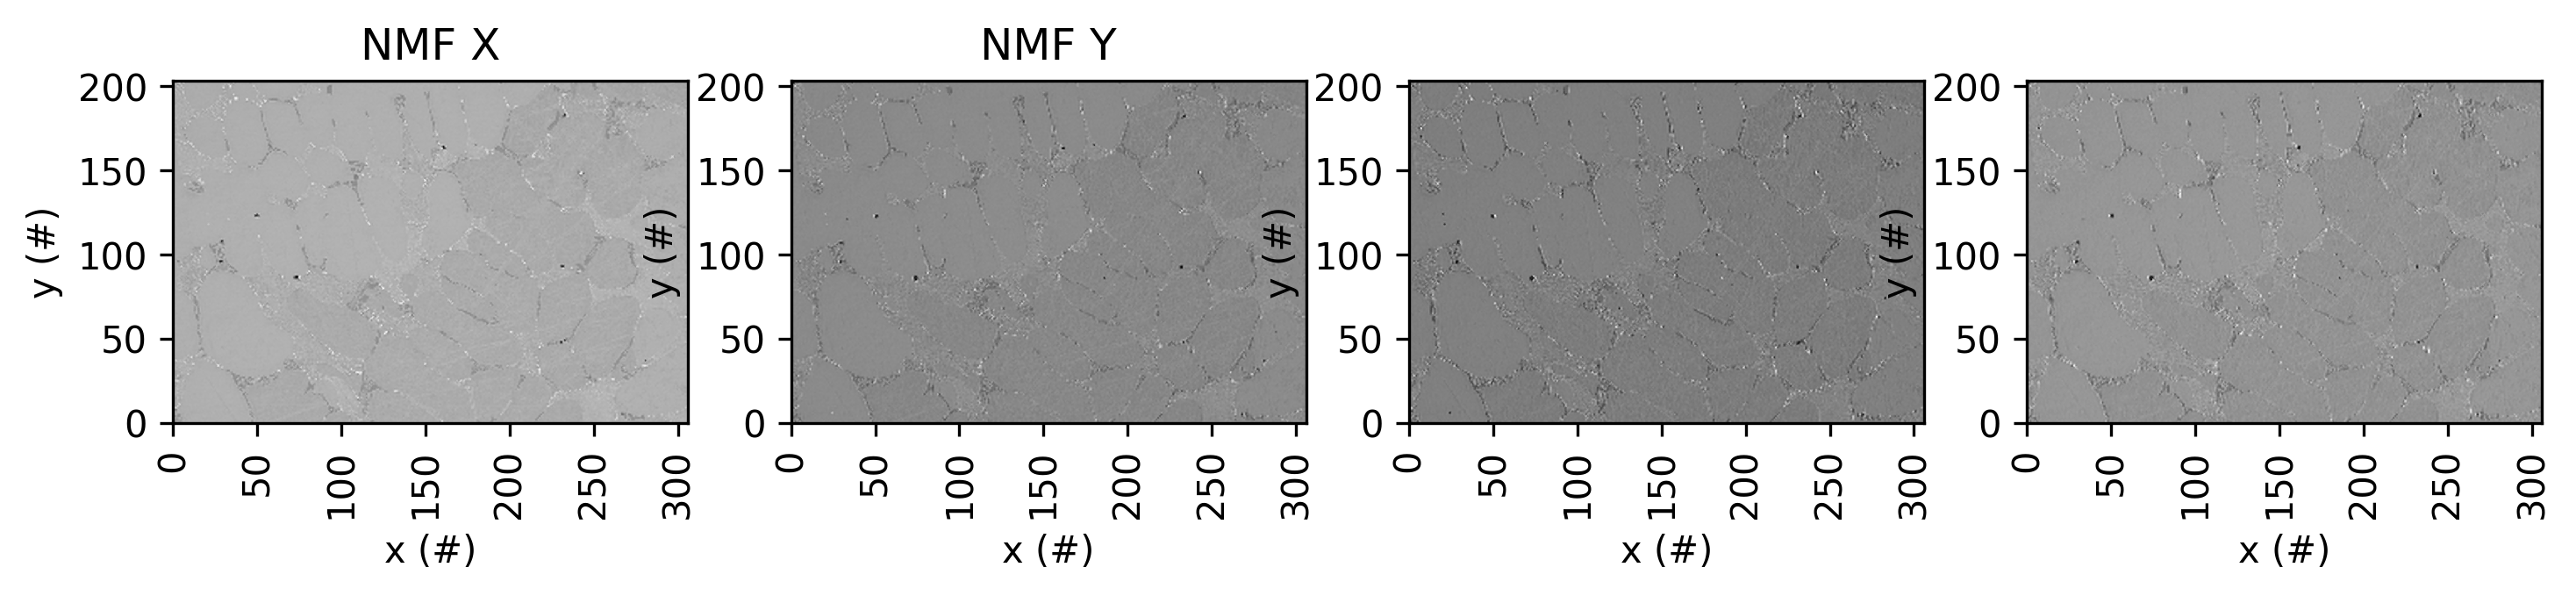

In [0]:
fig, axs = plt.subplots(1, 4, dpi=300, constrained_layout=False, figsize=(2,10))

for i, j in enumerate([X_nmf[:, 0],X_nmf[:, 1],X_nmf[:, 2],X_nmf[:, 3]]):

    points = np.array([x, y]).T # because griddata wants it that way
    z_grid2 = griddata(points, j, grid, method='cubic')
    # you get a 1D vector as result. Reshape to picture format!
    z_grid2 = z_grid2.reshape(xx.shape[0], yy.shape[0])

    axs[i].imshow(z_grid2, extent=[x_min, x_max,y_min, y_max],
            origin='upper', cmap=cm.gray)
    

    #plt.xticks(rotation='90')
    axs[i].set_xlabel('x (#)')
    axs[i].set_xticks(np.arange(x_min,x_max+1,50,))
    axs[i].set_ylabel('y (#)')
    axs[i].set_yticks(np.arange(y_min,y_max+1,50))
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=90)

#plt.xticks(rotation='90')
plt.subplots_adjust(left=0.5,right=5)
axs[0].set_title('NMF X')
axs[1].set_title('NMF Y')
#axs[2].set_title('Raw Image')

Seems to work better than PCA

Now Try Umap as it seemed to work well for the mnist data and is a less complex nonlinear dimensionality reduction method

In [0]:
#Umap
!pip install umap-learn
import umap
reducer = umap.UMAP(random_state=42,n_components=4)
reducerpca = umap.UMAP(random_state=42,n_components=4)
reducer.fit(dX)
reducerpca.fit(X_pca)


UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=4, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=42,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)

In [0]:
X_umap = reducer.transform(dX)
X_umap_pca=reducerpca.transform(X_pca)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(X_umap == reducer.embedding_))
assert(np.all(X_umap_pca == reducerpca.embedding_))
X_umap.shape
X_umap_pca.shape

(62628, 4)

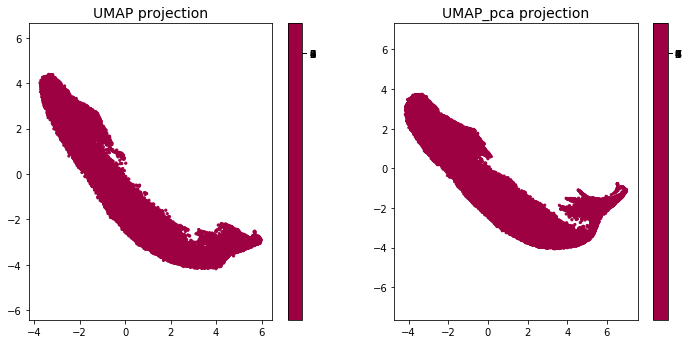

In [0]:
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=data["I"], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection', fontsize=14);

plt.subplot(222)
plt.scatter(X_umap_pca[:, 0], X_umap_pca[:, 1], c=data["I"], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP_pca projection', fontsize=14);


Text(0.5, 1.0, 'Umap Y')

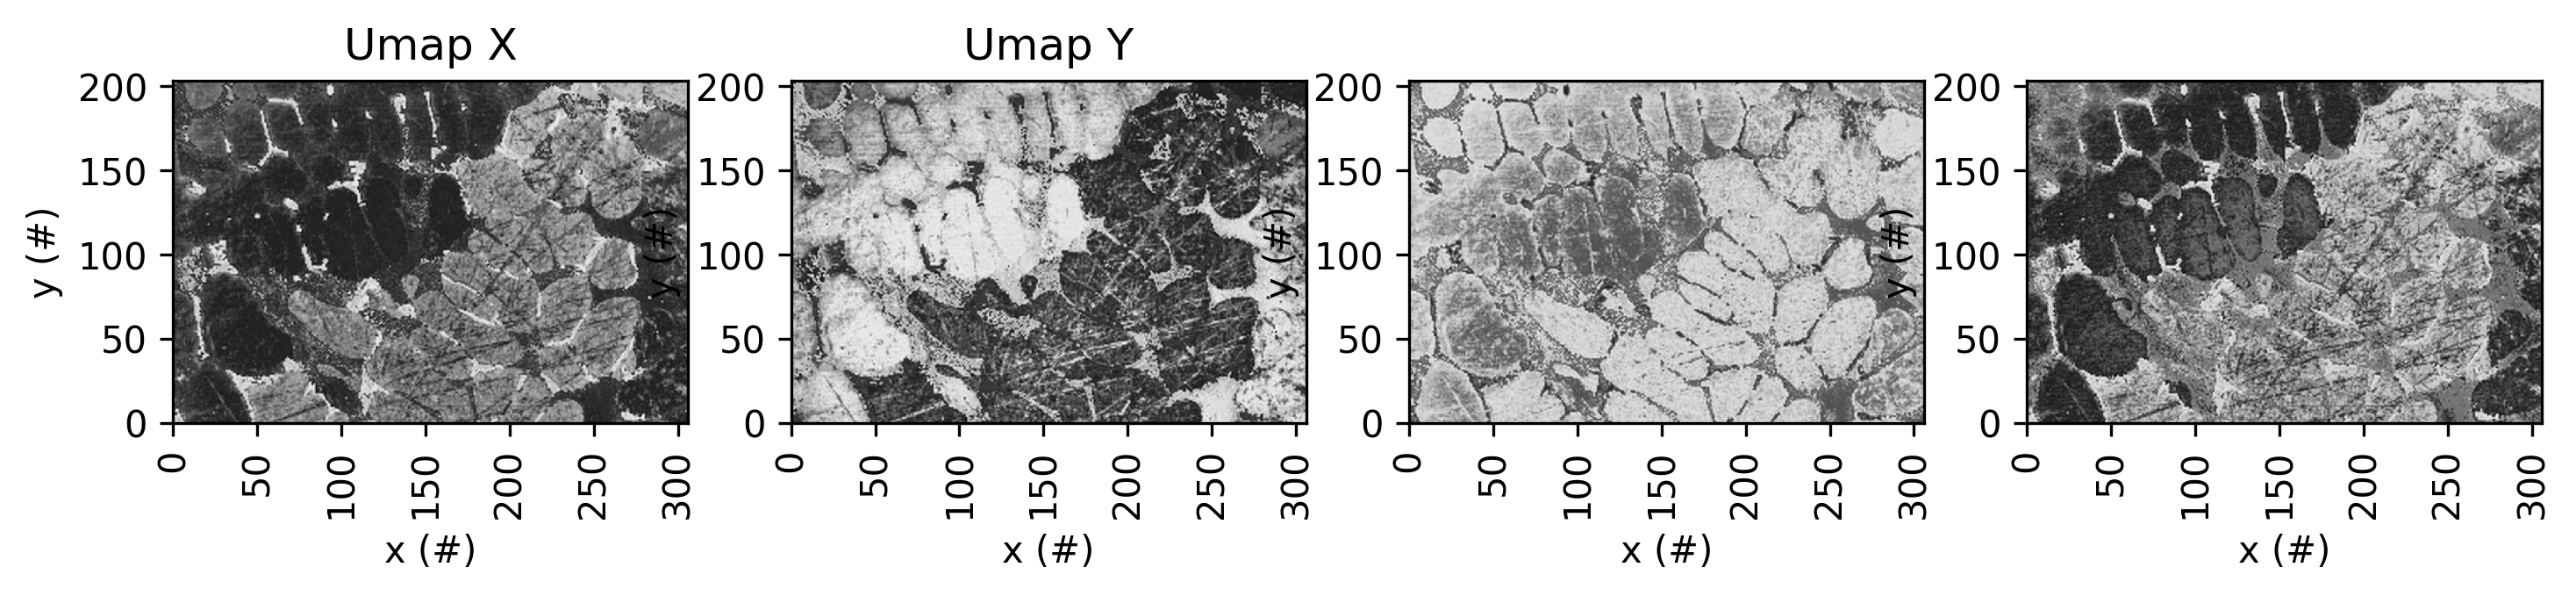

In [0]:
#import some more stuff for plotting purposes
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.interpolate import griddata

fig, axs = plt.subplots(1, 4, dpi=300, constrained_layout=False, figsize=(2,10))

for i, j in enumerate([X_umap[:, 0],X_umap[:, 1],X_umap[:, 2],X_umap[:, 3]]):

    points = np.array([x, y]).T # because griddata wants it that way
    z_grid2 = griddata(points, j, grid, method='cubic')
    # you get a 1D vector as result. Reshape to picture format!
    z_grid2 = z_grid2.reshape(xx.shape[0], yy.shape[0])

    axs[i].imshow(z_grid2, extent=[x_min, x_max,y_min, y_max],
            origin='upper', cmap=cm.gray)
    

    #plt.xticks(rotation='90')
    axs[i].set_xlabel('x (#)')
    axs[i].set_xticks(np.arange(x_min,x_max+1,50,))
    axs[i].set_ylabel('y (#)')
    axs[i].set_yticks(np.arange(y_min,y_max+1,50))
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=90)

#plt.xticks(rotation='90')
plt.subplots_adjust(left=0.5,right=5)
axs[0].set_title('Umap X')
axs[1].set_title('Umap Y')
#axs[2].set_title('Raw Image')

Seems to be working the best

Text(0.5, 1.0, 'X_umap_pca Y')

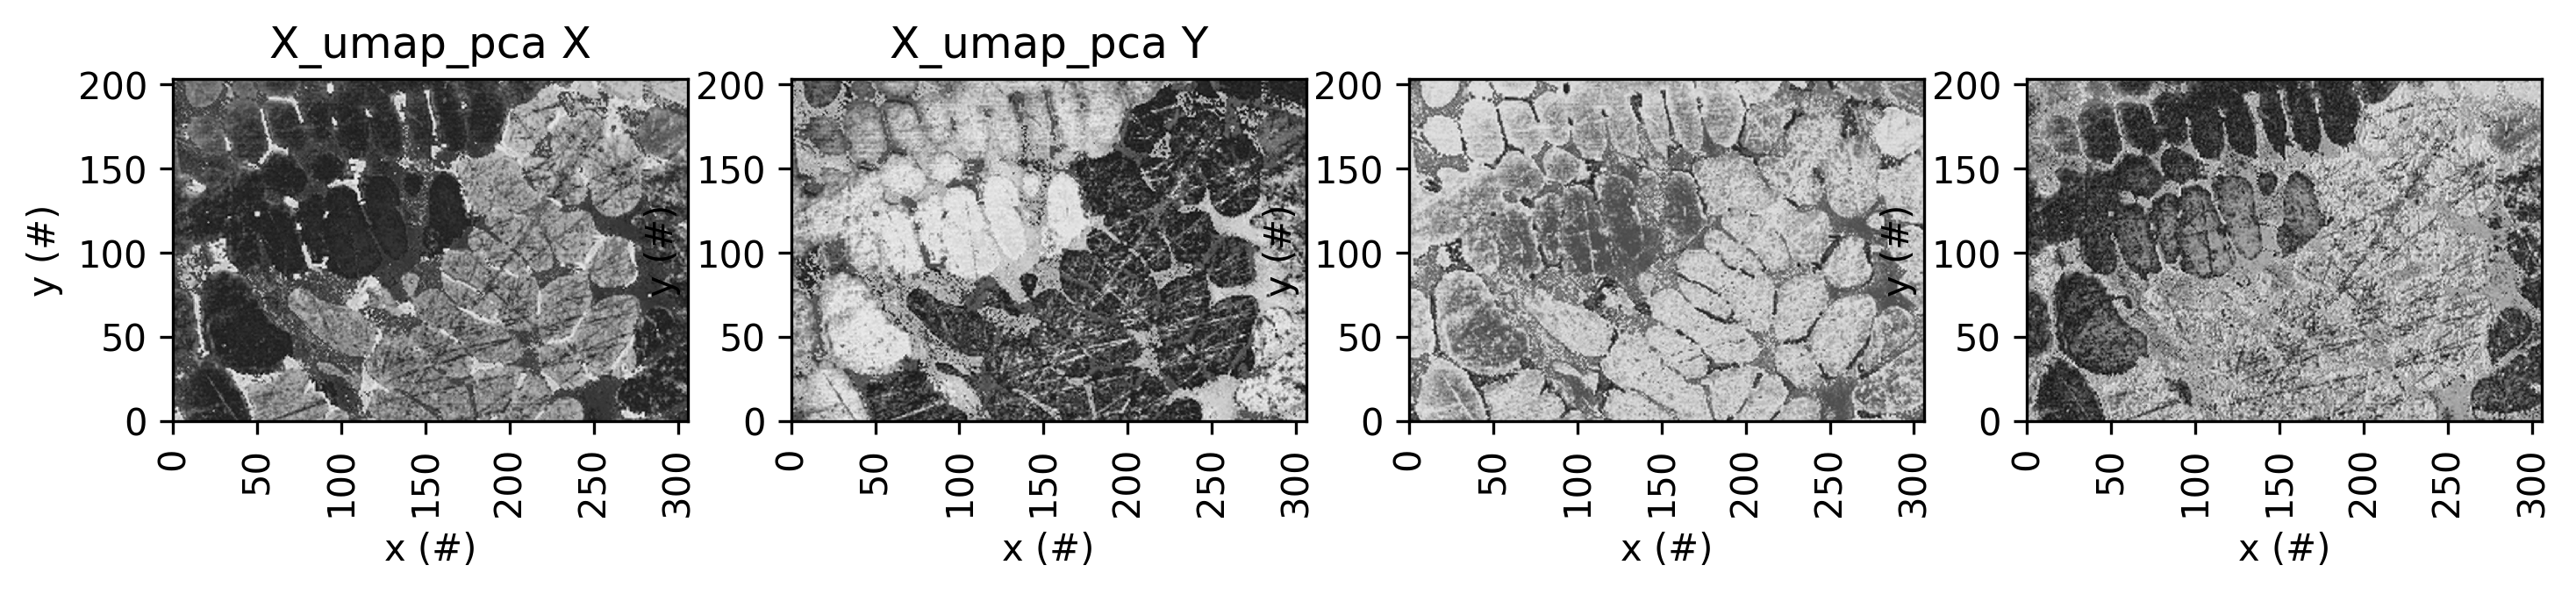

In [0]:
#import some more stuff for plotting purposes
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.interpolate import griddata

fig, axs = plt.subplots(1, 4, dpi=300, constrained_layout=False, figsize=(2,10))

for i, j in enumerate([X_umap_pca[:, 0],X_umap_pca[:, 1],X_umap_pca[:, 2],X_umap_pca[:, 3]]):

    points = np.array([x, y]).T # because griddata wants it that way
    z_grid2 = griddata(points, j, grid, method='cubic')
    # you get a 1D vector as result. Reshape to picture format!
    z_grid2 = z_grid2.reshape(xx.shape[0], yy.shape[0])

    axs[i].imshow(z_grid2, extent=[x_min, x_max,y_min, y_max],
            origin='upper', cmap=cm.gray)
    

    #plt.xticks(rotation='90')
    axs[i].set_xlabel('x (#)')
    axs[i].set_xticks(np.arange(x_min,x_max+1,50,))
    axs[i].set_ylabel('y (#)')
    axs[i].set_yticks(np.arange(y_min,y_max+1,50))
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=90)

#plt.xticks(rotation='90')
plt.subplots_adjust(left=0.5,right=5)
axs[0].set_title('X_umap_pca X')
axs[1].set_title('X_umap_pca Y')
#axs[2].set_title('Raw Image')

Umap of PCA data appears to lose some resolution/features

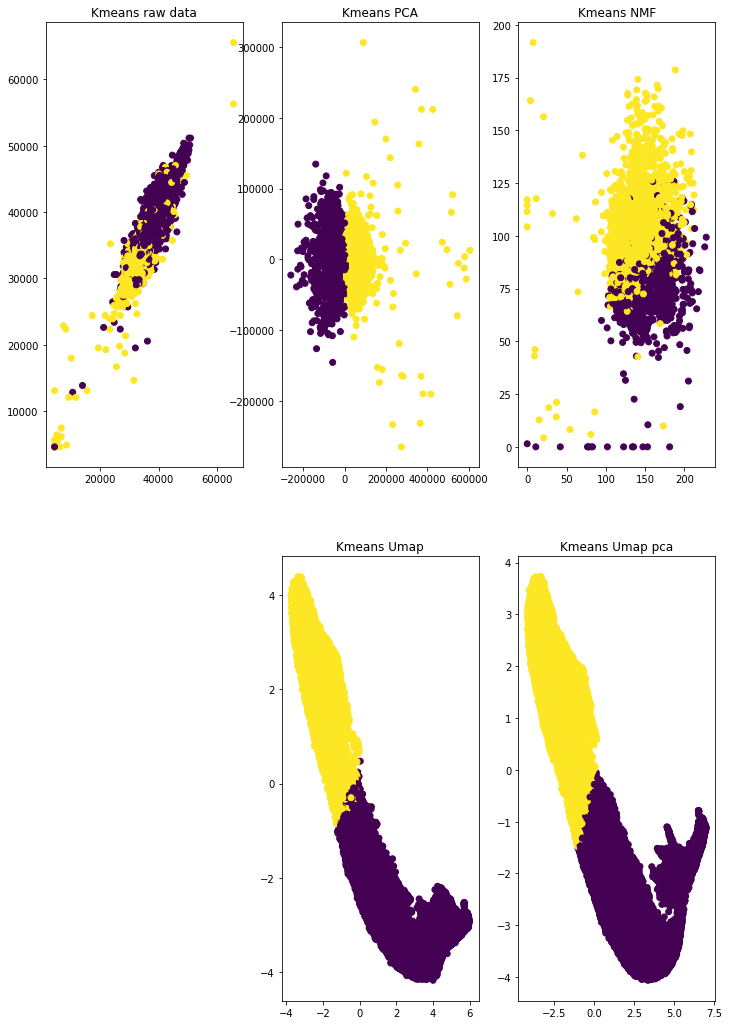

In [0]:
#Kmeans of 3 models

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

plt.figure(figsize=(12, 18))
clust=2
random_state = 170
X=dX

# Incorrect number of clusters
y_pred = KMeans(n_clusters=clust, random_state=random_state).fit_predict(X)

plt.subplot(231)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Kmeans raw data")

k2_pca_pred = KMeans(n_clusters=clust).fit_predict(X_pca)

plt.subplot(232)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=k2_pca_pred)
plt.title("Kmeans PCA")

k2_nmf_pred = KMeans(n_clusters=clust).fit_predict(X_nmf)

plt.subplot(233)
plt.scatter(X_nmf[:, 0], X_nmf[:, 1], c=k2_nmf_pred)
plt.title("Kmeans NMF")

#k2_nmf_pca_pred = KMeans(n_clusters=clust).fit_predict(X_nmf_pca)

#plt.subplot(234)
#plt.scatter(X_nmf_pca[:, 0], X_nmf_pca[:, 1], c=k2_nmf_pca_pred)
#plt.title("Kmeans NMF pca")


k2_umap_pred = KMeans(n_clusters=clust).fit_predict(X_umap)

plt.subplot(235)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=k2_umap_pred)
plt.title("Kmeans Umap")

k2_umap_pca_pred = KMeans(n_clusters=clust).fit_predict(X_umap_pca)

plt.subplot(236)
plt.scatter(X_umap_pca[:, 0], X_umap_pca[:, 1], c=k2_umap_pca_pred)
plt.title("Kmeans Umap pca")

plt.show()

In [0]:
"""use unet-work in progress"""
import tf_unet
import tensorflow as tf
from tf_unet import unet, util, image_util

#preparing data loading
data_provider = image_util.ImageDataProvider("/Slice/1/*.png")

#setup & training
net = unet.Unet(layers=3, features_root=64, channels=1, n_class=2)
trainer = unet.Trainer(net)
path = trainer.train(data_provider, output_path, training_iters=32, epochs=100)

#verification
...

prediction = net.predict(path, data)

unet.error_rate(prediction, util.crop_to_shape(label, prediction.shape))

img = util.combine_img_prediction(data, label, prediction)
#util.save_image(img, "prediction.jpg")

ModuleNotFoundError: ignored